In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Read in tweet data
all_tweets = pd.read_json("random_tweets.json", lines=True)

In [3]:
# Explore column headers
print(all_tweets.columns)

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')


In [4]:
# Explore retweet_count column to check how viral a tweet went
print(all_tweets['retweet_count'])

0            3
1            0
2            5
3        11106
4            6
         ...  
11094     2582
11095     6753
11096        0
11097        3
11098        0
Name: retweet_count, Length: 11099, dtype: int64


In [5]:
# Calculate median number of retweets, if greater than median, tweet considered viral
median_retweets = all_tweets['retweet_count'].median()
print(f'Median Number of tweets: {median_retweets}')

all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] >= median_retweets, 1, 0)
print(all_tweets['is_viral'].value_counts())

Median Number of tweets: 13.0
1    5591
0    5508
Name: is_viral, dtype: int64


In [6]:
# Feature Engineering - create columns to train the model
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)

In [7]:
# Split tweet data into model data and model label
labels = all_tweets['is_viral']
data = all_tweets[['tweet_length','followers_count','friends_count']]

In [8]:
# Scale (normalise) model data
scaled_data = scale(data, axis=0)

In [9]:
# Split data into training and testing data
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)

In [10]:
# Create KNN classifier model, k=5
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

0.590990990990991


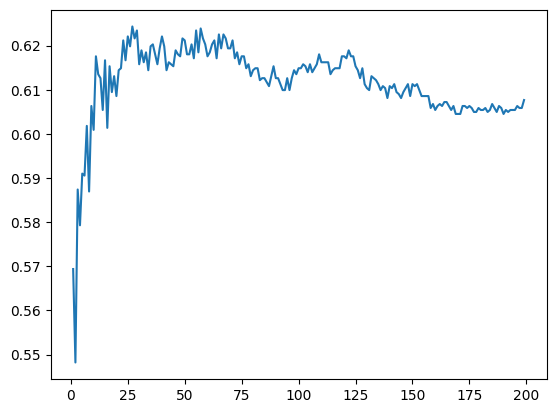

In [11]:
# Evaluate different values of k
scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
    
plt.plot(range(1,200), scores)
plt.show()

In [12]:
# Create KNN classifier model, k=25
classifier = KNeighborsClassifier(n_neighbors = 25)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

0.622072072072072
